In [2]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import neighbors, metrics, preprocessing #機械学習用のライブラリを利用
import sklearn.model_selection as cross_validation
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
from sklearn.kernel_approximation import RBFSampler #カーネル近似用の関数
from matplotlib.colors import ListedColormap #plot用

In [3]:
# 2：XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200,2) 
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

,0
0,0
1,0
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,0


<function matplotlib.pyplot.show>

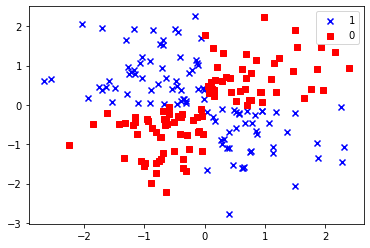

In [4]:
# 3：プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [5]:
# 4：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

In [6]:
# 解説5：機械学習で分類する---------------------------------------------------
n_neighbors = 5
clf_result = neighbors.KNeighborsClassifier(n_neighbors, weights="distance") #weights = 'uniform'

In [10]:
# 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.95
正解率の標準偏差 =  0.031622776601683784


正解率： 0.9


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


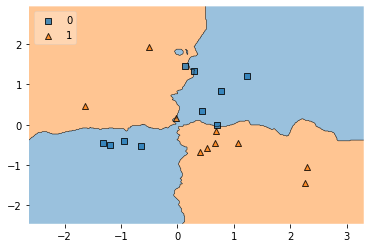

In [20]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_std, z, test_size=0.1, random_state=0)
clf_result.fit(X_train, y_train)
print("正解率：", clf_result.score(X_test, y_test))
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(y_train)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(y_test)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット